In [58]:
# ---------------------------------------------------
# CIFAR-10 HIGH ACCURACY CNN MODEL
# ---------------------------------------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np


In [59]:
train_dir = "/Users/mayur/Downloads/DL for AI/cifar-10-img/train"
test_dir  = "/Users/mayur/Downloads/DL for AI/cifar-10-img/test"

train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(32, 32),        # CIFAR-10 size
    color_mode="rgb",           # CIFAR images are RGB
    batch_size=64,
    shuffle=True
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(32, 32),
    color_mode="rgb",
    batch_size=64,
    shuffle=True
)

# Convert dataset into Tensors (x, y)
x_train, y_train = next(iter(train_ds.unbatch().batch(50000)))
x_test, y_test   = next(iter(test_ds.unbatch().batch(10000)))

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class names from folder
class_names = train_ds.class_names
print("Classes:", class_names)

Found 40079 files belonging to 10 classes.
Found 9921 files belonging to 10 classes.
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


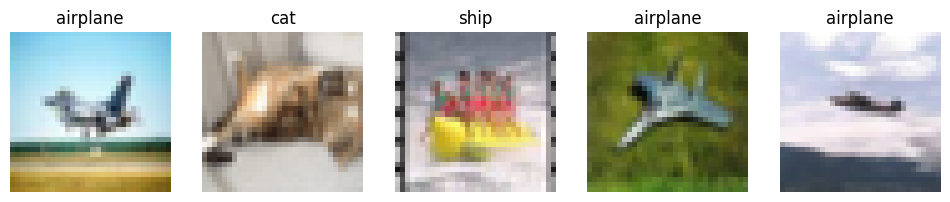

In [74]:

# ---------------------------------------------------
# 2. Show Few Sample Images
# ---------------------------------------------------

plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i].numpy())
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

In [61]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [62]:
# ---------------------------------------------------
# 3. Define CNN Model
# ---------------------------------------------------

model = Sequential([
    # Block 1
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Dense Layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [63]:
# ---------------------------------------------------
# 4. Compile Model
# ---------------------------------------------------
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [64]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
627/627 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.3234 - loss: 2.1788 - val_accuracy: 0.5559 - val_loss: 1.2329
Epoch 2/15
627/627 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.5253 - loss: 1.3240 - val_accuracy: 0.6188 - val_loss: 1.0923
Epoch 3/15
627/627 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.5946 - loss: 1.1343 - val_accuracy: 0.6227 - val_loss: 1.1874
Epoch 4/15
627/627 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.6421 - loss: 1.0047 - val_accuracy: 0.6901 - val_loss: 0.8721
Epoch 5/15
627/627 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.6810 - loss: 0.9105 - val_accuracy: 0.6955 - val_loss: 0.9066
Epoch 6/15
627/627 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7097 - loss: 0.8344 - val_accuracy: 0.7353 - val_loss: 0.7629
Epoch 7/15
627/627 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.7181 - loss: 0.8014 - val_accuracy: 0.6403 - val_loss: 1.2125
Epoch 8/15
627/627 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7393 - loss: 0.7590 - 

In [65]:
# -----------------------------
# e) Evaluate the model
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8112 - loss: 0.5628
Test Accuracy: 0.8100997805595398


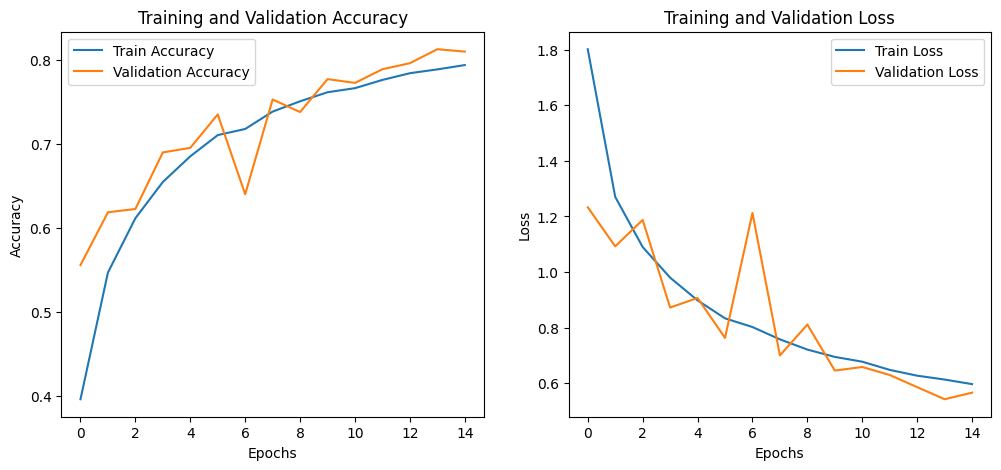

In [66]:
# Plot Training History
plt. figure(figsize=(12, 5))
# Accuracy
plt. subplot (1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title( 'Training and Validation Accuracy')
plt.xlabel ( 'Epochs')
plt.ylabel ( 'Accuracy')
plt.legend()
# Loss
plt. subplot (1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title( 'Training and Validation Loss')
plt.xlabel ('Epochs')
plt.ylabel( 'Loss')
plt.legend()

plt.show()

311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


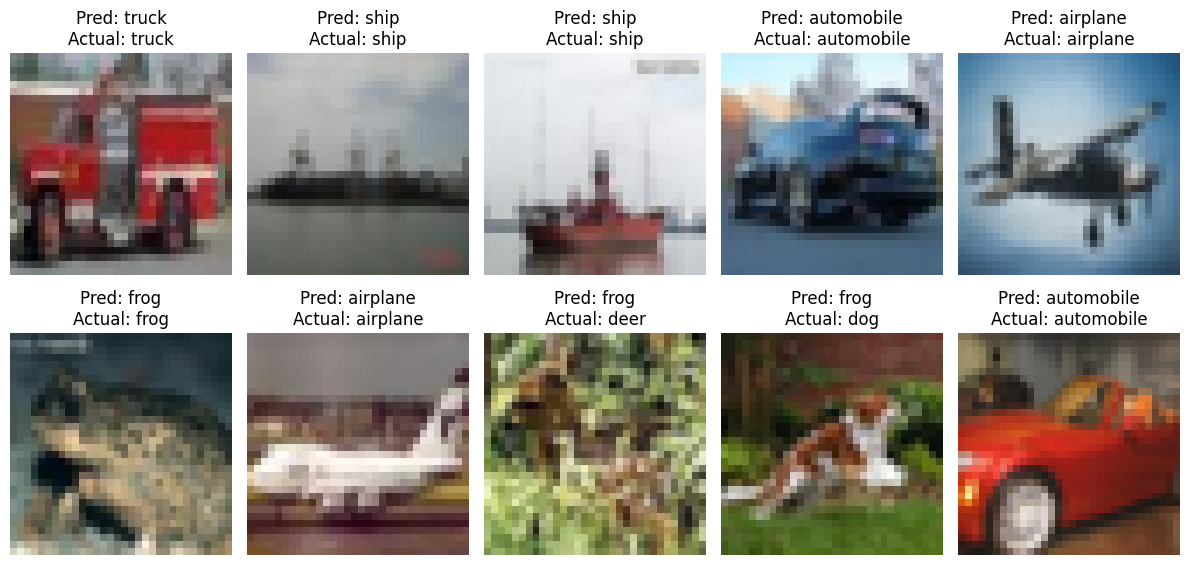

In [68]:
# ---------------------------------------------------
# 8. Make Predictions
# ---------------------------------------------------
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# ---------------------------------------------------
# 9. Show Prediction Results
# ---------------------------------------------------
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    actual = class_names[y_test[i]]
    pred = class_names[predicted_labels[i]]
    plt.title(f"Pred: {pred}\nActual: {actual}")
    plt.axis("off")

plt.tight_layout()
plt.show()